In [15]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Mostrar todas las columnas sin límite
pd.set_option('display.max_columns', None)

In [17]:
colores = {
    'domingo': 'orange',
    'lunes': 'red',
    'martes': 'blue',
    'miercoles': 'purple',
    'jueves': 'green',
    'viernes': 'yellow',
    'sabado': 'pink'
}
csv_files = ['1_domingo/productos_procesado.zip', '2_lunes/productos_procesado.zip', '3_martes/productos_procesado.zip', '4_miercoles/productos_procesado.zip', '5_jueves/productos_procesado.zip', '6_viernes/productos_procesado.zip', '7_sabado/productos_procesado.zip']
productos_df = pd.concat([pd.read_csv(f, sep='|') for f in csv_files], ignore_index=True)
# Al leer el csv las columnas vuelven a ser sus tipos nativos entonces las reconvertimos a categóricas
productos_df['dia_semana'] = productos_df['dia_semana'].astype('category')
productos_df['id_sucursal'] = productos_df['id_sucursal'].astype('category')
productos_df['id_producto'] = productos_df['id_producto'].astype('category')
productos_df['productos_unidad_medida_presentacion'] = productos_df['productos_unidad_medida_presentacion'].astype('category')
productos_df['productos_marca'] = productos_df['productos_marca'].astype('category')
productos_df['productos_unidad_medida_referencia'] = productos_df['productos_unidad_medida_referencia'].astype('category')
productos_df['id_producto_code'] = productos_df['id_producto'].cat.codes

#  Normalizamos los precios agrupando por cada id_producto
scaler = StandardScaler()
productos_df['precio_zscore'] = productos_df.groupby('id_producto')['productos_precio_referencia'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

# productos_df = productos_df[productos_df['productos_descripcion'].str.contains('yerba', case=False, na=False)]
display(productos_df.head())
display(productos_df.info())

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_19844/3959645665.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_df['precio_zscore'] = productos_df.groupby('id_producto')['productos_precio_referencia'].transform(


,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2,dia_semana,id_bandera,sucursales_nombre,sucursales_tipo,sucursales_latitud,sucursales_longitud,sucursales_barrio,sucursales_localidad,sucursales_provincia,id_producto_code,precio_zscore
0,130,7798151952981,True,MANI TOSTADO CON CASCARA KING X 175 GRS,1.0,UNI,KING,1300.0,7428.57,175.0,GRM,NaN,NaN,NaN,NaN,domingo,2,Mar del Plata Centro,Supermercado,-37.998923,-57.553648,NaN,Mar del Plata,Buenos Aires,10738,-1.498954
1,438,7791293045733,True,SHAMPOO CERAMIDAS SEDAL X 340 CC,1.0,UNI,SEDAL,4419.0,12997.06,340.0,CM3,NaN,NaN,NaN,NaN,domingo,3,25 de Mayo 2650,Supermercado,-34.500302,-58.694886,NaN,Los Polvorines,Buenos Aires,5595,0.802411
2,272,7790990999868,True,LAVAVAJILLA LIMON ZORRO BOTELLA X 500 CC,1.0,UNI,ZORRO,2209.0,4418.00,500.0,CM3,NaN,NaN,NaN,NaN,domingo,2,San Fernando II,Supermercado,-34.441795,-58.553738,NaN,San Fernando,Buenos Aires,5128,-0.279165
3,120,7790040173200,True,GALLETITAS KESITAS ESTUCHE X 125 GRS,1.0,UNI,KESITAS,1769.0,14152.00,125.0,GRM,NaN,NaN,NaN,NaN,domingo,2,Belgrano Cabildo,Supermercado,-34.558821,-58.459349,NaN,Ciudad Autónoma de Buenos Aires,CABA,2537,-0.766931
4,212,7791720039748,True,GALLETITAS SURTIDO RELLENAS BULNEZ X 350 GRS,1.0,UNI,BULNEZ,1550.0,4428.57,350.0,GRM,NaN,NaN,NaN,NaN,domingo,2,Malaver - Villa Ballester,Supermercado,-34.557290,-58.550437,NaN,Villa Ballester,Buenos Aires,7135,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680556 entries, 0 to 2680555
Data columns (total 26 columns):
 #   Column                                Dtype   
---  ------                                -----   
 0   id_sucursal                           category
 1   id_producto                           category
 2   productos_ean                         bool    
 3   productos_descripcion                 object  
 4   productos_cantidad_presentacion       float64 
 5   productos_unidad_medida_presentacion  category
 6   productos_marca                       category
 7   productos_precio_lista                float64 
 8   productos_precio_referencia           float64 
 9   productos_cantidad_referencia         float64 
 10  productos_unidad_medida_referencia    category
 11  productos_precio_unitario_promo1      float64 
 12  productos_leyenda_promo1              object  
 13  productos_precio_unitario_promo2      float64 
 14  productos_leyenda_promo2              float64 
 15

None

In [18]:
productos_df["id_producto"].nunique()

12322

In [19]:
productos_df["id_producto"].value_counts()

id_producto
7793416109261    539
7622201735906    539
7622201503987    539
7798159716479    539
7753442000390    539
                ... 
7702003010798      1
2505298000001      1
2300075000003      1
7708228051196      1
7891010972226      1
Name: count, Length: 12322, dtype: int64

De la ultima celda podemos analizar que hay productos que estan en TODAS las sucursales y que hay productos que no

Para tener un análisis acorde tomamos aquellos productos de bebidas no alcóholicas que están en los tres tipos de comercios.

In [20]:
# Contar el número de días únicos por producto
productos_en_todos_los_dias_de_semana = productos_df.groupby('id_producto')['dia_semana'].nunique()

# Filtrar los productos que están en todas los días de la semana
productos_en_todos_los_dias_de_semana = productos_en_todos_los_dias_de_semana[productos_en_todos_los_dias_de_semana == 7].index

# Filtrar el DataFrame original
productos_df_dias_de_semana = productos_df[productos_df['id_producto'].isin(productos_en_todos_los_dias_de_semana)]
print(f"Cantidad de productos que estan en los 7 días de la semana: {productos_df_dias_de_semana['id_producto'].nunique()}")

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_19844/192654077.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todos_los_dias_de_semana = productos_df.groupby('id_producto')['dia_semana'].nunique()


Cantidad de productos que estan en los 7 días de la semana: 11393


### **Análisis de Outliers**

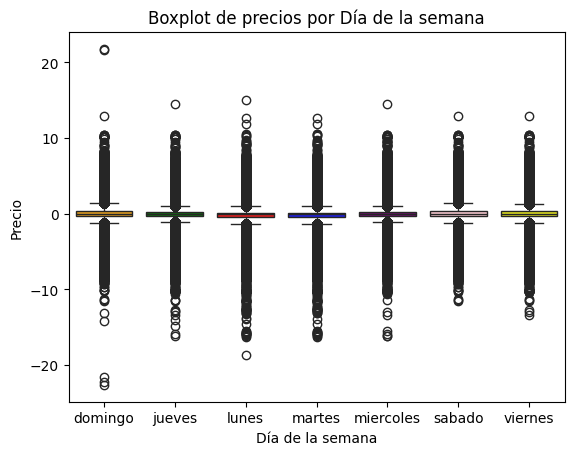

In [21]:
sns.boxplot(x='dia_semana', y='precio_zscore', hue='dia_semana', data=productos_df_dias_de_semana, palette=colores, legend=False)

plt.title('Boxplot de precios por Día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Precio')
plt.show()

In [22]:
def remove_outliers_iqr(group):
    Q1 = group['precio_zscore'].quantile(0.25)
    Q3 = group['precio_zscore'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['precio_zscore'] >= lower) & (group['precio_zscore'] <= upper)]

# Aplica la función por categoría
productos_df_dias_de_semana = productos_df_dias_de_semana.groupby('dia_semana', group_keys=False).apply(remove_outliers_iqr)

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_19844/3819931252.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_df_dias_de_semana = productos_df_dias_de_semana.groupby('dia_semana', group_keys=False).apply(remove_outliers_iqr)
/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_19844/3819931252.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  productos_df_dias_de_semana = productos_df_dias_de_semana.groupby('dia_semana', group_keys=False).apply(remove_outliers_iqr)


In [23]:
# Contar el número de días únicos por producto
productos_en_todos_los_dias_de_semana = productos_df_dias_de_semana.groupby('id_producto')['dia_semana'].nunique()

# Filtrar los productos que están en todas los días de la semana
productos_en_todos_los_dias_de_semana = productos_en_todos_los_dias_de_semana[productos_en_todos_los_dias_de_semana == 7].index

# Filtrar el DataFrame original
productos_df_dias_de_semana = productos_df_dias_de_semana[productos_df_dias_de_semana['id_producto'].isin(productos_en_todos_los_dias_de_semana)]
print(f"Cantidad de productos que estan en los 7 días de la semana: {productos_df_dias_de_semana['id_producto'].nunique()}")

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_19844/3500305214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todos_los_dias_de_semana = productos_df_dias_de_semana.groupby('id_producto')['dia_semana'].nunique()


Cantidad de productos que estan en los 7 días de la semana: 10468


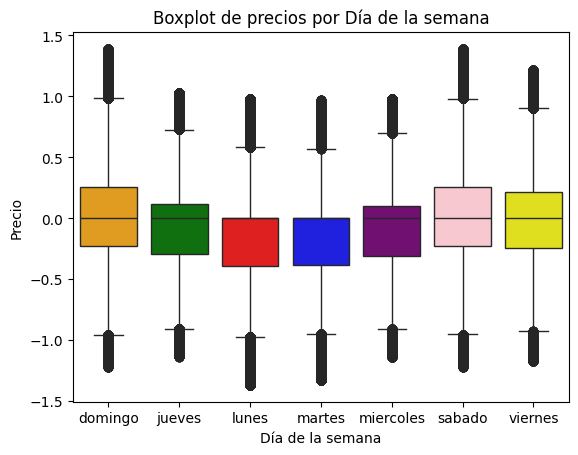

In [24]:
sns.boxplot(x='dia_semana', y='precio_zscore', hue='dia_semana', data=productos_df_dias_de_semana, palette=colores, legend=False)

plt.title('Boxplot de precios por Día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Precio')
plt.show()

### **Análisis de precios máximos y mínimos**

Analizamos el precio máximo y mínimo de cada producto agrupado por el tipo de comercio.

In [25]:
print("Cantidad de registros para cada día de la semana:")
print(productos_df_dias_de_semana['dia_semana'].value_counts())

# Agrupar por id_producto y dia_semana y calcular el máximo y mínimo de precio_zscore
resultado = productos_df_dias_de_semana.groupby(['id_producto_code', 'dia_semana'])['precio_zscore'].agg(['max', 'min']).reset_index()

resultado.head()

Cantidad de registros para cada día de la semana:
dia_semana
domingo      339404
sabado       339392
viernes      338834
jueves       328480
miercoles    322165
lunes        316707
martes       314465
Name: count, dtype: int64


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_19844/418742020.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado = productos_df_dias_de_semana.groupby(['id_producto_code', 'dia_semana'])['precio_zscore'].agg(['max', 'min']).reset_index()


,id_producto_code,dia_semana,max,min
0,0,domingo,0.0,0.0
1,0,jueves,0.0,0.0
2,0,lunes,0.0,0.0
3,0,martes,0.0,0.0
4,0,miercoles,0.0,0.0


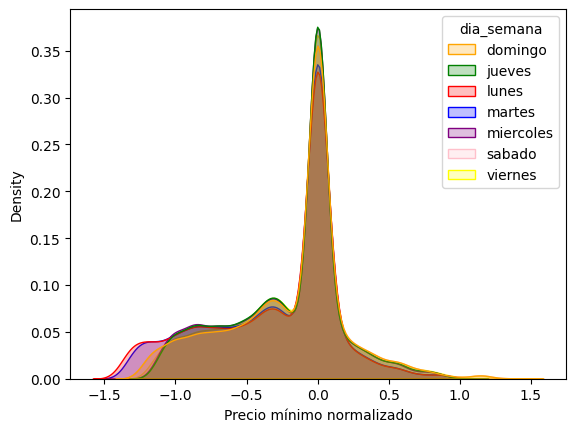

In [26]:
sns.kdeplot(data=resultado, x='min', hue='dia_semana', fill=True, palette=colores)
plt.xlabel('Precio mínimo normalizado')
plt.show()

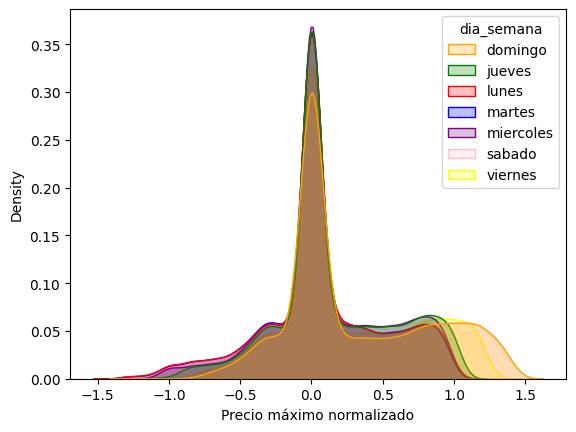

In [27]:
sns.kdeplot(data=resultado, x='max', hue='dia_semana', fill=True, palette=colores)
plt.xlabel('Precio máximo normalizado')
plt.show()

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_19844/925573489.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = productos_df_dias_de_semana.groupby('dia_semana')['precio_zscore'].mean().sort_values()


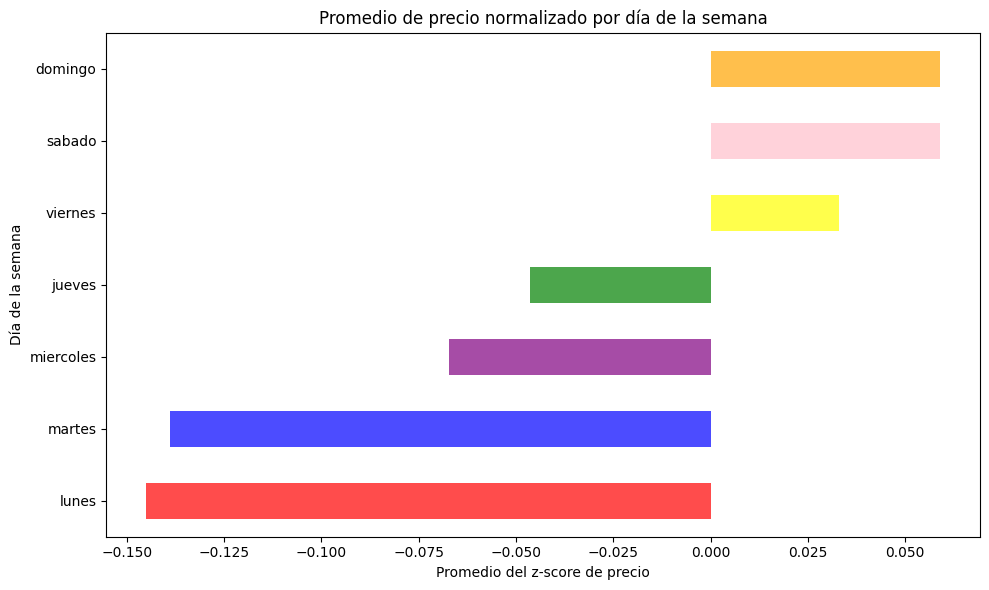

In [28]:
promedios = productos_df_dias_de_semana.groupby('dia_semana')['precio_zscore'].mean().sort_values()
# Hacer el gráfico de barras
colores_barras = [colores[nombre] for nombre in promedios.index]
promedios.plot(kind='barh', color=colores_barras, figsize=(10, 6), alpha=0.7)
plt.xlabel('Promedio del z-score de precio')
plt.ylabel('Día de la semana')
plt.title('Promedio de precio normalizado por día de la semana')
plt.tight_layout()
plt.show()